In [27]:
import pandas as pd
import pandas_profiling
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('weight-height.csv')

In [3]:
df.head()
print("length of dataset:", len(df))

length of dataset: 10000


In [4]:
x_weight = df["Weight"]
y_height = df["Height"]
x_weight_max = x_weight.max()
y_height_max = y_height.max()
print("x_weight_max:", x_weight_max)
print("y_height_max:", y_height_max)
x_weight_min = x_weight.min()
y_height_min = y_height.min()
print("x_weight_min:", x_weight_min)
print("y_height_min:", y_height_min)


m = len(y_height)

X = np.zeros((m, 2))

X[: ,0] = 1
X[: ,1] = x_weight
X

x_weight_max: 269.989698505106
y_height_max: 78.9987423463896
x_weight_min: 64.700126712753
y_height_min: 54.2631333250971


array([[  1.        , 241.89356318],
       [  1.        , 162.31047252],
       [  1.        , 212.74085556],
       ...,
       [  1.        , 128.47531878],
       [  1.        , 163.85246135],
       [  1.        , 113.64910268]])

In [5]:
#Defining theta
y_height = np.array(y_height)
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y_height)
initial_theta = theta

y_height

array([73.84701702, 68.78190405, 74.11010539, ..., 63.86799221,
       69.03424313, 61.94424588])

In [6]:
theta

array([48.47790261,  0.11081279])

Text(0, 0.5, 'height')

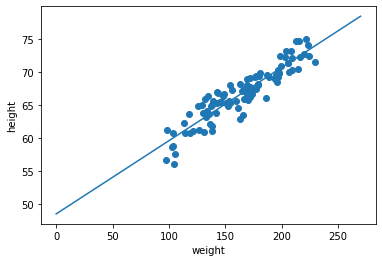

In [7]:
#Plotting 100 random values from dataset for greater visualisation
df_hundred = df.sample(n=100)

plt.scatter(df_hundred["Weight"], df_hundred["Height"])
a = np.linspace(0, 270, 10000)
b = theta[0] + a * theta[1]
plt.plot(a, b)
plt.xlabel("weight")
plt.ylabel("height")

In [8]:
#Hypothesis function
def h(theta, x):
    return theta[0] + theta[1] * x
h(theta, 73.84)

56.660319385178816

In [9]:
def gradient_step(theta, x, y, alpha, verbose=False):
    if verbose: print("Gradient step ", theta, x, y, alpha)
    delta = np.zeros(np.shape(theta))
    m = len(y)
    for i in range(m):
        delta[0] -= (2/float(m)) * (y[i] - h(theta, x[i]))
        delta[1] -= (2/float(m)) * (y[i] - h(theta, x[i])) * x[i]
        if verbose: print(i, delta)
    if verbose:
        print("Theta", theta - alpha * delta)
        print("Cost", sum(1/(2*m) * np.square(h(theta, np.array(x)) - np.array(y))))
    return theta - alpha * delta

def gradient_descent(x, y, initial_theta, alpha, iterations, verbose=False):
    theta = initial_theta
    for i in range(iterations):
        if verbose: print("** Iteration ", i)
        theta = gradient_step(theta, x, y, alpha, verbose)
    return theta

In [10]:
gradient_descent(x_weight, y_height, initial_theta, 0.01, 100)

array([2.39519183e+256, 4.01974131e+258])

In [11]:
def cost_2(theta, x, y):
    m = np.size(y)
    return sum(1/(2*m) * np.square(h2(theta, np.array(x)) - np.array(y)))

def h2(theta, x):
    X = np.ones([len(x),len(theta)])
    X[:,1] = x
    return X.dot(theta.T)

def linear_cost_prime(hyp, theta, x, y):
    delta = np.zeros(np.shape(theta))
    delta[0] -= (2/float(m)) * sum((y - hyp(theta, x)))
    delta[1] -= (2/float(m)) * sum((y - hyp(theta, x)) * x)
    return delta

In [12]:
cost_2(initial_theta, x_weight, y_height)

1.071855098441468

In [13]:
h2(initial_theta, x_weight)

array([75.2828044 , 66.46397971, 72.0523114 , ..., 62.71461176,
       66.6348518 , 61.07167731])

In [14]:
def gradient_descent_2(hyp, cost, cost_prime, x, y, theta, alpha, iterations, verbose=False):
    cost_history = []
    delta = np.zeros(np.shape(theta))
    for i in range(iterations):
        if verbose: print("** Iteration ", i)
        delta = cost_prime(hyp, theta, x, y)
        theta = theta - alpha * delta
        cost_history.append(cost(theta, x, y))
    return theta, cost_history

In [22]:
theta, cost_history = gradient_descent_2(h2, cost_2, linear_cost_prime, x_weight, y_height, np.array([0, 0]), 0.01, 10)

In [26]:
# x_axis = np.linspace(0, 5000, 500)
# plt.plot(x_axis, cost_history[5:505])
# plt.title("Cost of approximation")
# plt.xlabel("Iterations")
# plt.ylabel("Cost")

In [30]:
#Assignment 11: Use SciKit Learn to make a model for the 
#data set you worked on in Assignment 10.
X, y_height = np.array(x_weight).reshape(-1, 1), np.array(y_height)
lg = LinearRegression().fit(X, y_height)
lg.intercept_, lg.coef_

(48.4779026141796, array([0.11081279]))